In [153]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [154]:
# read file 

df = pd.read_csv('/Users/mac/Desktop/Data Analysis/winequality-red.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [155]:
# check if data has null values 
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [156]:
df.duplicated().sum()

240

In [157]:
df = df.drop_duplicates()
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [158]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [159]:
# 
df.shape

(1359, 12)

In [160]:
# list columns

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [161]:
# data type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


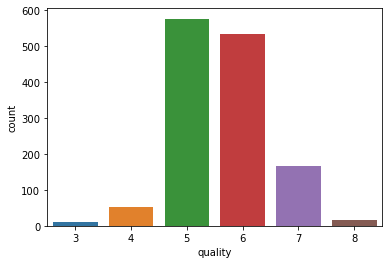

In [162]:
# plot acidity level 

sns.countplot(
    data = df , x = df['quality']
)
plt.show()

In [163]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

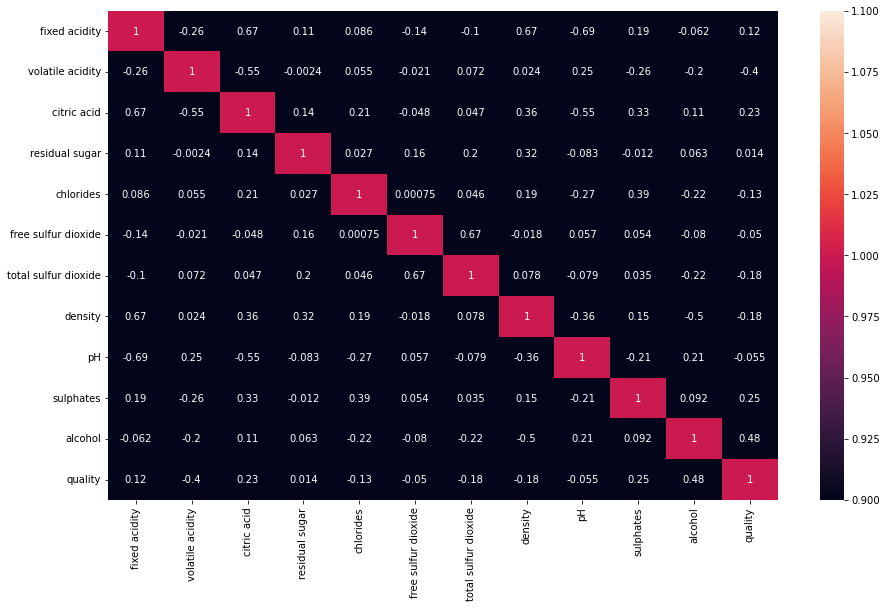

In [164]:
# check correlation between variables 

w = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(w , annot = True , linewidths=0 , vmin = 1, cmap = 'rocket')

In [165]:
# finding the correlation of qualitry in relation to other input variables

w['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

In [166]:
df['quality'].max()

8

In [167]:
# rating based on quality , can be based on descretion
reviews = []
for i in df['quality']:
    if i >= 1 and i <=4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <=10:
        reviews.append('3')
df['reviews'] = reviews

In [168]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,reviews
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


<AxesSubplot:xlabel='reviews', ylabel='count'>

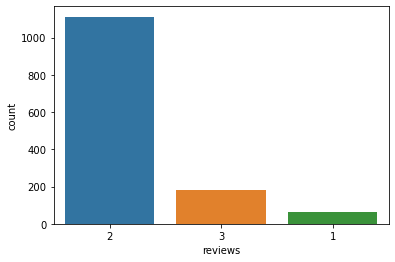

In [169]:
sns.countplot(x=df['reviews'])

[Text(0.5, 1.0, 'Alcohol percent based on wine quality'),
 Text(0, 0.5, 'alcohol percent')]

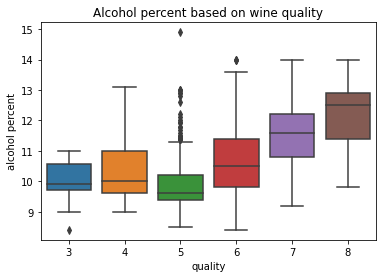

In [170]:
# Alcohol , wine quality analysis
box =sns.boxplot(x='quality' , y='alcohol', data=df)
box.set(title = 'Alcohol percent based on wine quality', ylabel='alcohol percent')

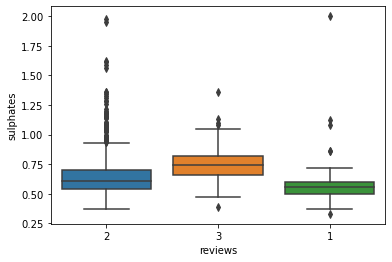

In [171]:
# analysis of sulphates against ratings 
bx = sns.boxplot(x ='reviews' ,y ='sulphates', data=df)


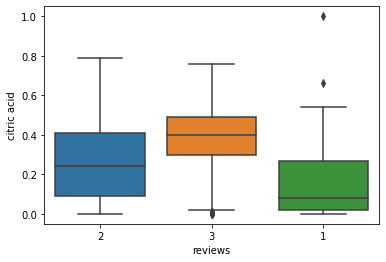

In [172]:
# against citirc acid

bx = sns.boxplot(x ='reviews' ,y ='citric acid', data=df)

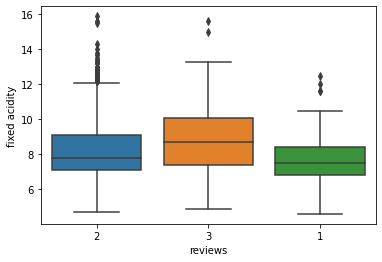

In [173]:
# fixed acidity

bx = sns.boxplot(x ='reviews' ,y ='fixed acidity', data=df)

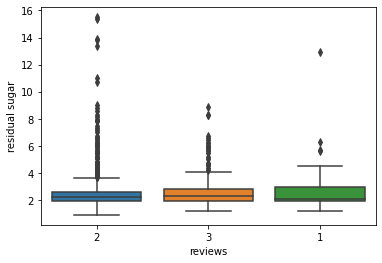

In [174]:
# residual sugar
bx = sns.boxplot(x ='reviews' ,y ='residual sugar', data=df)

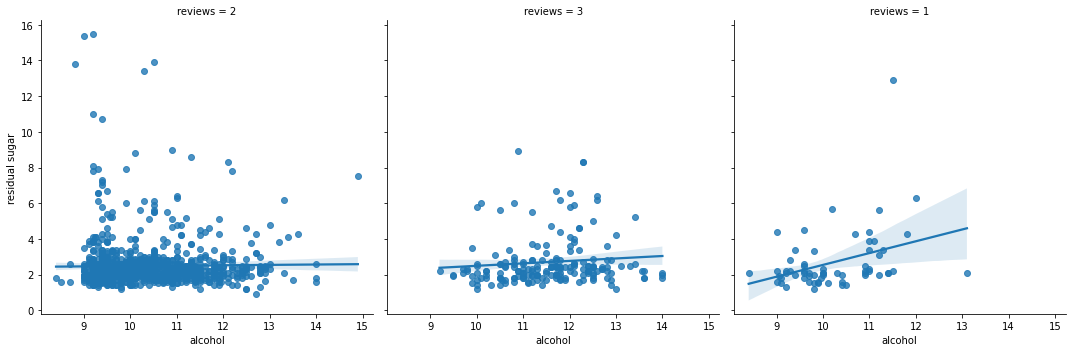

In [175]:
# use linear regression to make predictions

sns.lmplot(x='alcohol', y ='residual sugar', col='reviews' , data =df)

In [176]:
x=df.drop('quality', axis=1 )
y=df['quality']

In [177]:
print('Qaulity',y)
print('Other features',x)

Qaulity 0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64
Other features       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597           

In [178]:
x_train , x_test, y_train , y_test = train_test_split( x, y,test_size = 0.4, random_state=1)

In [179]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,reviews
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6,2
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,2
533,10.3,0.270,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8,2
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,3
268,6.9,0.540,0.04,3.0,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
702,7.0,0.640,0.02,2.1,0.067,9.0,23.0,0.99700,3.47,0.67,9.4,2
295,10.8,0.500,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,2
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,2
894,7.2,0.630,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8,2


In [180]:
# using linear regression to predict quality
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [181]:
# model prediction on test data 
model.predict(x_test)

array([5.7020901 , 5.24731143, 6.01925814, 7.0618439 , 5.41928014,
       5.90849781, 5.48638973, 7.28036632, 7.2864349 , 5.75205276,
       5.33353396, 5.55006743, 5.29614941, 5.21465305, 3.86356079,
       5.82170344, 5.4559936 , 5.66049688, 5.34435934, 5.44111239,
       7.10730216, 5.43212046, 5.43259142, 7.11314654, 5.5284187 ,
       5.56620275, 5.33624792, 5.38589517, 5.37013981, 5.5212246 ,
       5.23729262, 6.14575703, 5.85740554, 5.24949567, 5.18881019,
       5.30536914, 5.50039425, 5.30381968, 5.45611571, 5.4672487 ,
       5.09515991, 6.99789117, 7.29953031, 5.48240933, 5.36952607,
       5.55001171, 5.73969689, 6.02711512, 5.50633639, 5.51986223,
       5.76434546, 5.32979569, 7.27791849, 5.85609856, 5.19289359,
       5.66695469, 5.6350732 , 5.56079916, 5.56401518, 6.79665132,
       5.19935183, 5.83284195, 5.40927788, 7.12233041, 5.29637284,
       5.63036336, 5.25588639, 5.90297744, 5.73937401, 5.91377787,
       5.40784412, 5.26071178, 5.24802788, 5.33854046, 5.74630

In [182]:
# test for model accuracy
model.score(x_test,y_test)

0.7291639923875851

In [183]:
# using Naive bayes classification
Gmodel = GaussianNB()
Gmodel.fit(x_train,y_train)

GaussianNB()

In [184]:
Gmodel.predict(x_test)

array([6, 5, 6, 7, 5, 6, 6, 7, 7, 6, 6, 6, 5, 5, 4, 6, 6, 6, 6, 6, 7, 5,
       6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 7, 6,
       5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5, 7, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 4, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 4, 5, 7, 5, 5, 6, 5, 6, 6, 8, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 8, 6, 6, 8, 7, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 6, 8, 6, 6, 5, 6, 5, 8, 4, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       7, 5, 5, 6, 6, 5, 7, 5, 7, 4, 6, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5,
       4, 5, 5, 5, 7, 5, 4, 6, 6, 5, 5, 5, 5, 5, 3, 5, 5, 4, 6, 6, 6, 5,
       6, 6, 7, 7, 7, 5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 6, 7, 5, 5, 5, 6,
       6, 5, 4, 5, 8, 5, 5, 5, 5, 6, 5, 5, 5, 8, 5, 5, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 4, 4, 5, 6, 7, 6, 3, 5, 6, 6, 7, 6, 6, 8, 5, 5, 5, 4,
       5, 6, 5, 6, 4, 7, 5, 5, 5, 6, 6, 5, 4, 6, 5,

In [185]:
# Naive Bayes classification score
model.score(x_test,y_test)

0.7291639923875851